In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Statistical analysis
import scipy.stats as stats

# Machine learning
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Part B.
Using the data in [https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/credit_card_defaults.csv], create the best classification model based for predicting whether or not an individual will default on their next months payment: default payment next month == 1.

- Introduce the data to your audience in a paragraph.

- In a single paragraph report on your model and briefly describe other models you considered and your process for selecting a model.

- In a paragraph, give a description of the model that you choose.

The variables in these data are: limit is Amount of the given credit (dollars), gender (1 = male; 2 = female), education_level (1 = graduate school; 2 = university; 3 = high school; 4 = others), marital_status (1 = married; 2 = single; 3 = others), age ( in years),

pay_0 is repayment in previous month, pay_2 is repayment two months ago, pay_3 is repayment status three months ago, ....
These features/variables take the values: -1 is paid on time, 1 is payment delayed by one month, 2 is payment delayed by two months, …, 9 is payment delayed for nine months or more.

bill_amt1 is amount of current bill statement, bill_amt2 is the bill statement for the previous month, bill_amt3 is the bill statement for two months ago, …. bill_amt6 is the bill statement for five months ago.

pay_amt1 is the amount paid on last months bill, pay_amt2 is the amount paid on the bill from two months ago, ..., pay_amt6 is the amount paid on the bill from six months ago.

In [2]:
credit_default = pd.read_csv('https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/credit_card_defaults.csv')
credit_default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Rename Column

In [3]:
# change default payment next month name to DEFAULT
credit_default = credit_default.rename(columns={'default payment next month': 'DEFAULT'})


In [4]:
credit_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

## Confusion Matrix Function

In [ ]:
# Visualizing confusion matrices for each classifier
# Here's another function for plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names) # type: ignore
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')# If we have a bumpy but somewhat smooth boundary, which of these methods is likely to work best on out of sample data: Logistic, LDA, QDA, kNN?  Why? # type: ignore
    plt.show()

## Decision Tree Model Experiment

In [14]:
output = []
# Choose the features X and target y
X = credit_default[["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]
y = credit_default["DEFAULT"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a decision tree classifier and fit it to the scaled training data
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)
dtree.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = dtree.predict(X_test_scaled)

# Calculate the accuracy of the model    
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8146666666666667


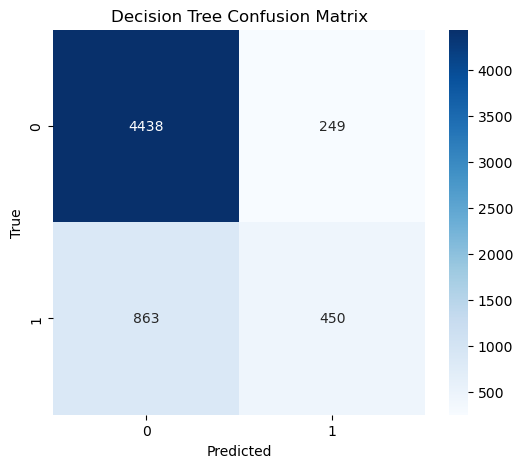

In [15]:
# create a confustion matrix for the decision tree
feature_names = ["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
target_names = ["0", "1"]
plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix')


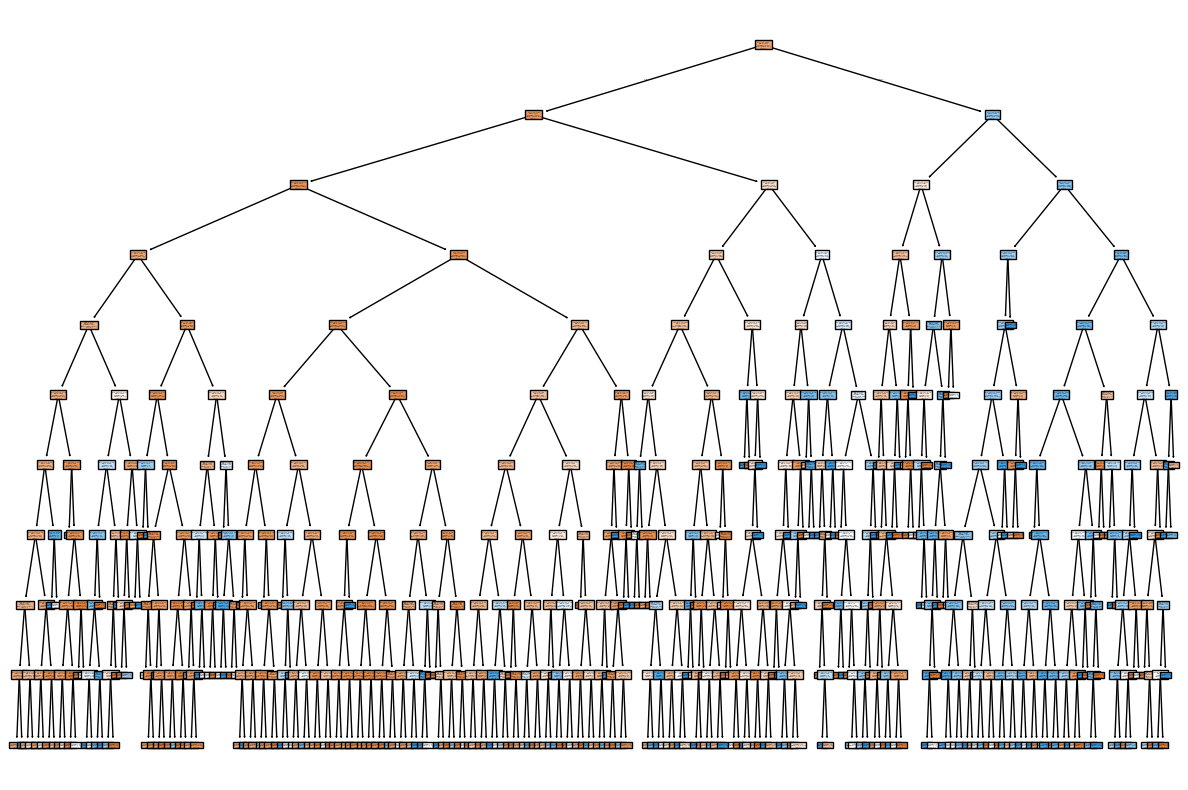

In [17]:
## create a plot of the Decision Tree
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names=target_names, filled=True)

## Decision Tree Pruned

In [18]:
dt_pre_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)

# Train the model
dt_pre_pruned.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

### Decision Tree Plot

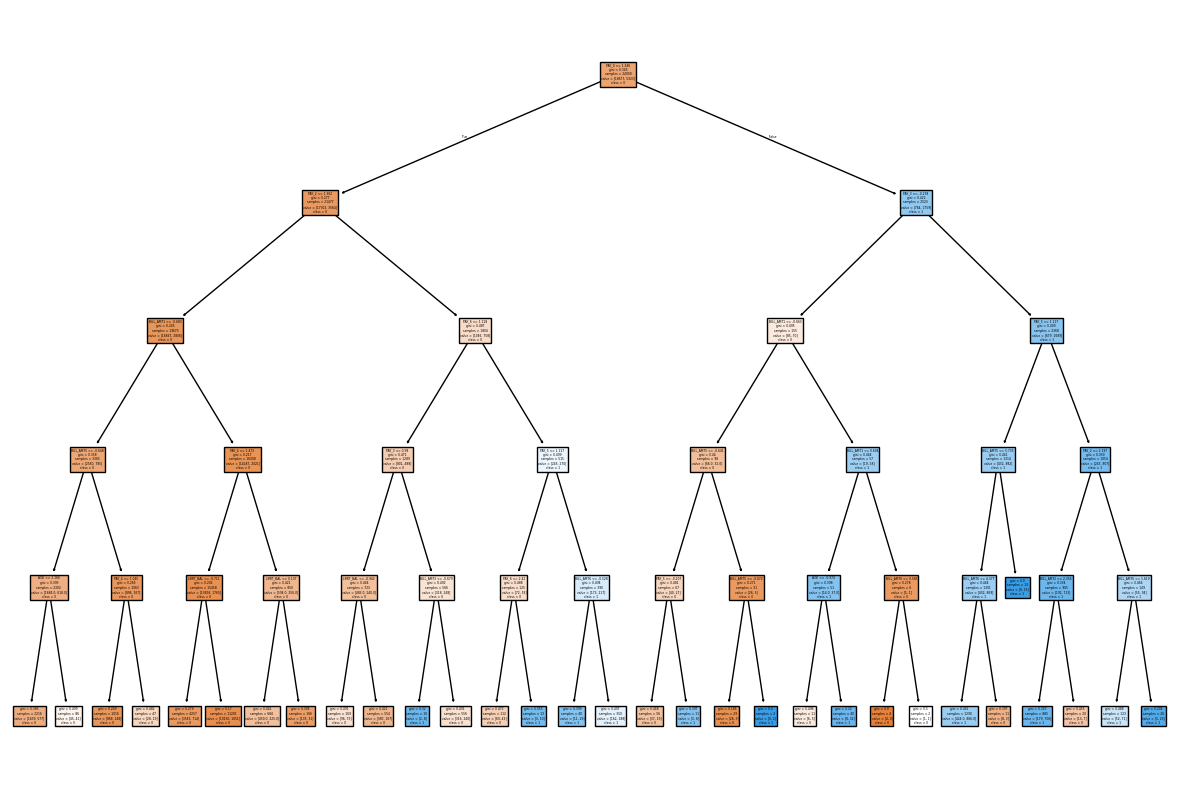

In [13]:

## create a plot of the Decision Tree
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(dt_pre_pruned, feature_names=feature_names, class_names=target_names, filled=True)


Accuracy: 0.8208333333333333


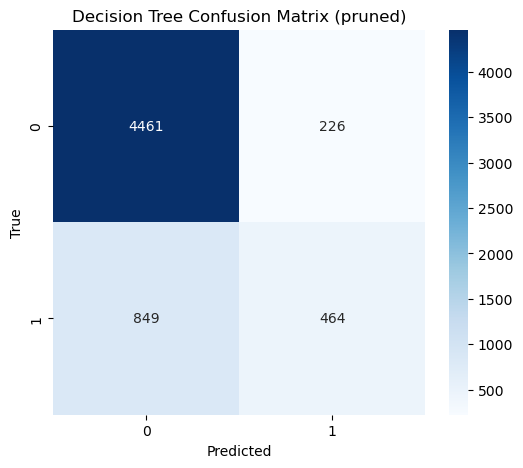

In [19]:
y_pred = dt_pre_pruned.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix (pruned)')


In [70]:
# Cross validation for decision tree
scores = cross_val_score(dt_pre_pruned, X, y, cv=5)
# print accuarcy without the =- 
print(f"Decision Tree cross-validation accuracy: {scores.mean() * 100:.2f}%")


Decision Tree cross-validation accuracy: 81.68%


## RBF Kernel SVM Model

RBF Kernel SVM accuracy: 82.17%


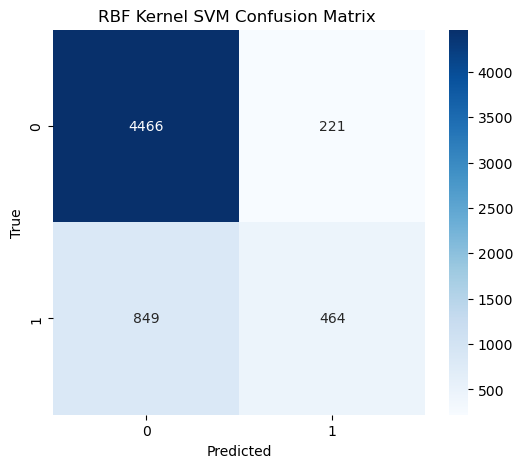

In [71]:
# Create an RBF kernel SVM model
rbf_svm = SVC(kernel='rbf')

# Train the model on the training data
rbf_svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel SVM accuracy: {accuracy_rbf * 100:.2f}%")

plot_confusion_matrix(y_test, y_pred_rbf, 'RBF Kernel SVM Confusion Matrix ')



In [72]:


cv_scores_rbf = cross_val_score(rbf_svm, X, y, cv=5)  # 5-fold cross-validation
print(f"RBF Kernel SVM cross-validation accuracy: {cv_scores_rbf.mean() * 100:.2f}%")
# append output to output list
output.append(f"RBF Kernel SVM cross-validation accuracy: {cv_scores_rbf.mean() * 100:.2f}%")

RBF Kernel SVM cross-validation accuracy: 77.88%
